# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import class_functions as cf
import warnings
import math
from matplotlib.pyplot import figure
import os 
import glob
import statistics
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir('resources/DataFiles'))

['Cities.csv', 'Conferences.csv', 'ConferenceTourneyGames.csv', 'GameCities.csv', 'NCAATourneyCompactResults.csv', 'NCAATourneyDetailedResults.csv', 'NCAATourneySeedRoundSlots.csv', 'NCAATourneySeeds.csv', 'NCAATourneySlots.csv', 'RegularSeasonCompactResults.csv', 'RegularSeasonDetailedResults.csv', 'Seasons.csv', 'SecondaryTourneyCompactResults.csv', 'SecondaryTourneyTeams.csv', 'TeamCoaches.csv', 'TeamConferences.csv', 'Teams.csv', 'TeamSpellings.csv']


In [3]:
data_dict = {}
for i in glob.glob('resources/DataFiles/*'):
    name = str(i.split('/')[-1].split('.')[0])
    name = name.replace('DataFiles\\', '')
    print(i)
    if 'TeamSpellings' not in name:
        data_dict[name] = pd.read_csv(i)
    else:
        data_dict[name] = pd.read_csv(i, encoding='latin-1') 

resources/DataFiles\Cities.csv
resources/DataFiles\Conferences.csv
resources/DataFiles\ConferenceTourneyGames.csv
resources/DataFiles\GameCities.csv
resources/DataFiles\NCAATourneyCompactResults.csv
resources/DataFiles\NCAATourneyDetailedResults.csv
resources/DataFiles\NCAATourneySeedRoundSlots.csv
resources/DataFiles\NCAATourneySeeds.csv
resources/DataFiles\NCAATourneySlots.csv
resources/DataFiles\RegularSeasonCompactResults.csv
resources/DataFiles\RegularSeasonDetailedResults.csv
resources/DataFiles\Seasons.csv
resources/DataFiles\SecondaryTourneyCompactResults.csv
resources/DataFiles\SecondaryTourneyTeams.csv
resources/DataFiles\TeamCoaches.csv
resources/DataFiles\TeamConferences.csv
resources/DataFiles\Teams.csv
resources/DataFiles\TeamSpellings.csv


# Most Tourney Wins Since 1985 (By Team)

In [4]:
tourney_results = data_dict['NCAATourneyCompactResults']
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


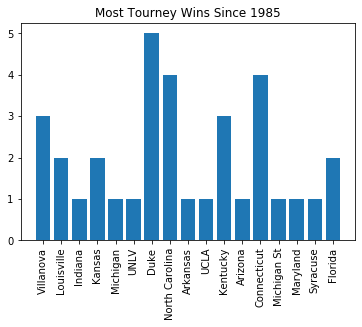

In [9]:
seasons = list(set(tourney_results['Season']))
tourney_winners = {}
for season in seasons:
    games = tourney_results[tourney_results['Season'] == season]
    last_game = games[games['DayNum'] == games['DayNum'].max()]
    tourney_winner = cf.getTeamName(last_game['WTeamID'].values[0])
    if tourney_winner in tourney_winners:
        tourney_winners[tourney_winner] = tourney_winners[tourney_winner] + 1
    else:
        tourney_winners[tourney_winner] = 1

plt.title(label='Most Tourney Wins Since 1985')
 
plt.bar(range(len(tourney_winners)), tourney_winners.values())

plt.xticks(range(len(tourney_winners)), tourney_winners.keys(), rotation=90)

plt.show()

# Most Tourney Wins Since 1985 (By Conference)

In [418]:
data_dict['Conferences'].head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


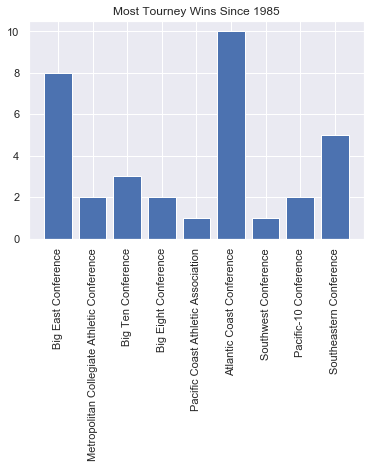

In [419]:
def getTeamConference(teamName):
    teams = data_dict['Teams']
    teamId = teams[teams['TeamName'] == teamName]['TeamID'].values[0]
    teamConference = data_dict['TeamConferences'][data_dict['TeamConferences']['TeamID'] == teamId]
    return teamConference.iloc[0]['ConfAbbrev']

tourney_winners_confs = {}
for team in tourney_winners:
    teamConference = getTeamConference(team)
    if teamConference in tourney_winners_confs:
        tourney_winners_confs[teamConference] = tourney_winners_confs[teamConference]  + tourney_winners[team]
    else:
        tourney_winners_confs[teamConference] = tourney_winners[team]

def full_conference_name(conf):
    return data_dict['Conferences'][data_dict['Conferences']['ConfAbbrev'] == conf]['Description'].values[0]

corrected_tourney_wins_confs = {}
for conf in tourney_winners_confs:
    corrected_tourney_wins_confs[full_conference_name(conf)] = tourney_winners_confs[conf]

plt.title(label='Most Tourney Wins Since 1985')

plt.bar(range(len(corrected_tourney_wins_confs)), corrected_tourney_wins_confs.values())

plt.xticks(range(len(corrected_tourney_wins_confs)), corrected_tourney_wins_confs.keys(), rotation=90)

plt.show()

# Most Games Won Since 1985 (By Team)

In [420]:
teams = data_dict['Teams']
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2019
1,1102,Air Force,1985,2019
2,1103,Akron,1985,2019
3,1104,Alabama,1985,2019
4,1105,Alabama A&M,2000,2019


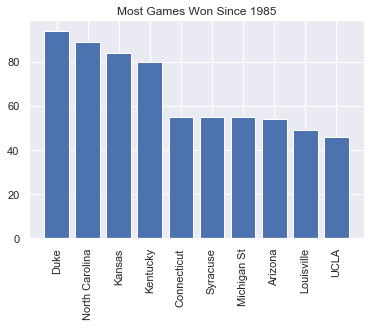

In [421]:
team_wins_losses = []
for team in teams.values:
    team_id = team[0]
    team_name = team[1]
    num_wins = len(list(tourney_results[tourney_results['WTeamID'] == team_id].values))
    num_losses = len(list(tourney_results[tourney_results['LTeamID'] == team_id].values))
    team_wins_losses.append({'Teams': team_name, 'Wins': num_wins, 'Losses': num_losses})
win_lose_df = pd.DataFrame(pd.DataFrame.from_dict(team_wins_losses))

# top ten winning teams (number of games won)
sorted_winning = win_lose_df.sort_values(by=['Wins'], ascending=False)
top_ten_winning_teams = sorted_winning.head(10)
del top_ten_winning_teams['Losses']

# not valuable information: teams listed just play a lot of tournaments
#sorted_losing = win_lose_df.sort_values(by=['Losses'], ascending=False)
#top_ten_losing_teams = sorted_losing.head(10)
#top_ten_losing_teams

plt.title(label='Most Games Won Since 1985')
 
plt.bar(range(len(top_ten_winning_teams)), top_ten_winning_teams['Wins'])

plt.xticks(range(len(top_ten_winning_teams)), top_ten_winning_teams['Teams'], rotation=90)

plt.show()

# Most Titles Won Since 1985 (By Seed)

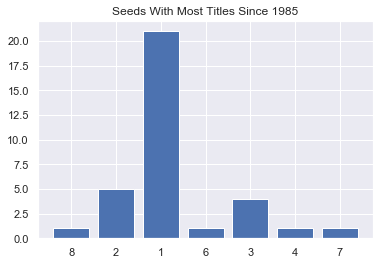

In [422]:
seed_wins = {}
for season in seasons:
    games = tourney_results[tourney_results['Season'] == season]
    last_game = games[games['DayNum'] == games['DayNum'].max()]
    tourney_winner = last_game['WTeamID'].values[0]
    tourney_seed = int(data_dict['NCAATourneySeeds'][(data_dict['NCAATourneySeeds']['TeamID'] == tourney_winner) & 
                                                 (data_dict['NCAATourneySeeds']['Season'] == season)].values[0][1][1:])
    if tourney_seed in seed_wins:
        seed_wins[tourney_seed] += 1
    else:
        seed_wins[tourney_seed] = 1

plt.title(label='Seeds With Most Titles Since 1985')
 
plt.bar(range(len(seed_wins)), list(seed_wins.values()))

plt.xticks(range(len(seed_wins)), list(seed_wins.keys()))

plt.show()

# Winning Teams Average Basic Stats (Regular Season) 

In [423]:
data_dict['RegularSeasonDetailedResults'].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [424]:
data_dict['RegularSeasonDetailedResults']['Season_join'] = data_dict['RegularSeasonDetailedResults']['Season'] + 1

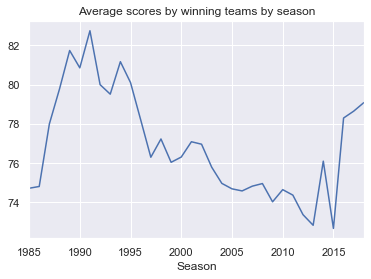

In [486]:
plt.title('Average scores by winning teams by season');
data_dict['RegularSeasonCompactResults'].groupby(['Season'])['WScore'].mean().plot();

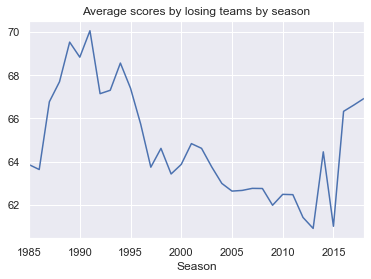

In [487]:
plt.title('Average scores by losing teams by season');
data_dict['RegularSeasonCompactResults'].groupby(['Season'])['LScore'].mean().plot();

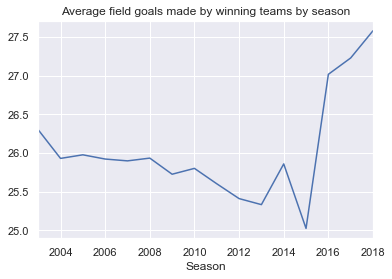

In [452]:
plt.title('Average field goals made by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WFGM'].mean().plot();

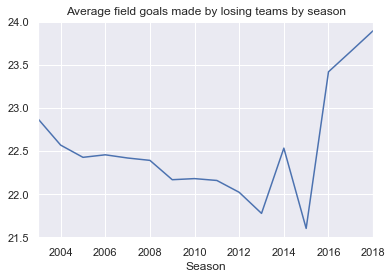

In [471]:
plt.title('Average field goals made by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LFGM'].mean().plot();

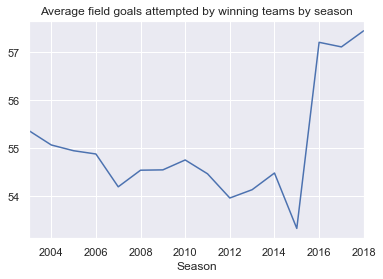

In [453]:
plt.title('Average field goals attempted by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WFGA'].mean().plot();

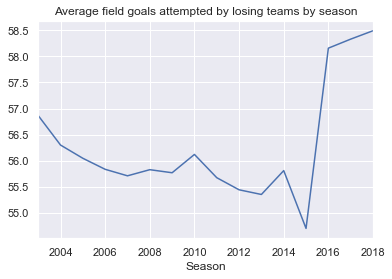

In [474]:
plt.title('Average field goals attempted by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LFGA'].mean().plot();

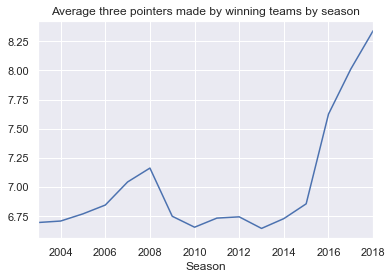

In [454]:
plt.title('Average three pointers made by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WFGM3'].mean().plot();

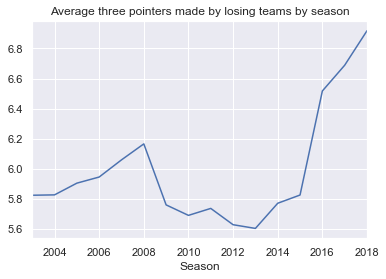

In [475]:
plt.title('Average three pointers made by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LFGM3'].mean().plot();

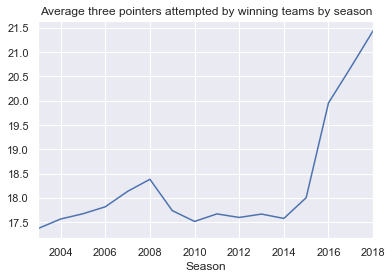

In [460]:
plt.title('Average three pointers attempted by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WFGA3'].mean().plot();

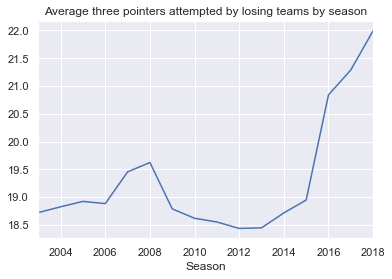

In [476]:
plt.title('Average three pointers attempted by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LFGA3'].mean().plot();

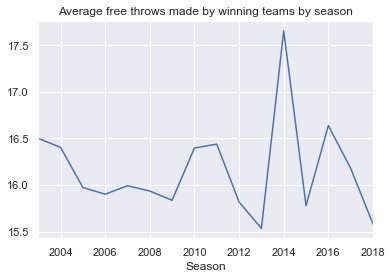

In [477]:
plt.title('Average free throws made by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WFTM'].mean().plot();

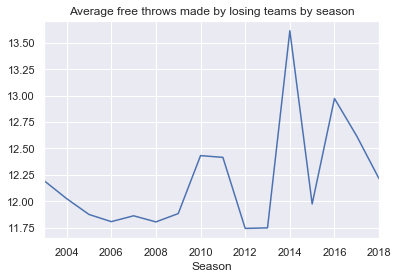

In [478]:
plt.title('Average free throws made by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LFTM'].mean().plot();

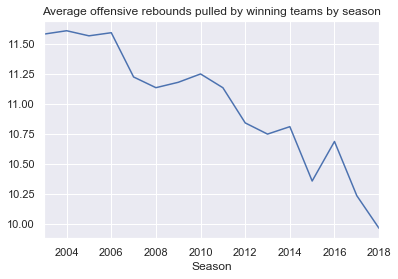

In [462]:
plt.title('Average offensive rebounds pulled by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WOR'].mean().plot();

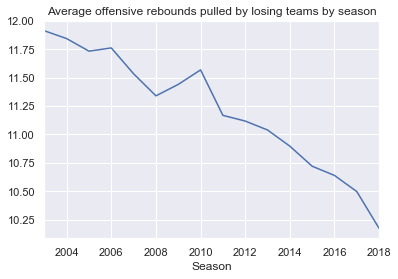

In [479]:
plt.title('Average offensive rebounds pulled by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LOR'].mean().plot();

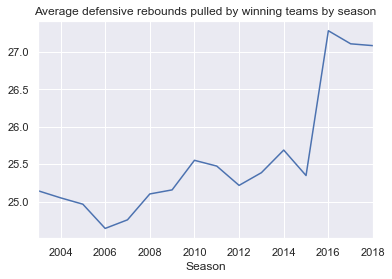

In [464]:
plt.title('Average defensive rebounds pulled by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WDR'].mean().plot();

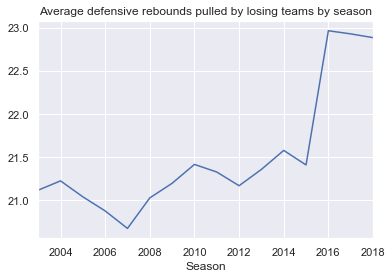

In [480]:
plt.title('Average defensive rebounds pulled by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LDR'].mean().plot();

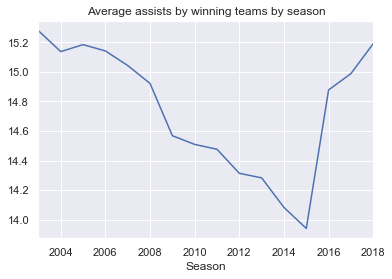

In [465]:
plt.title('Average assists by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WAst'].mean().plot();

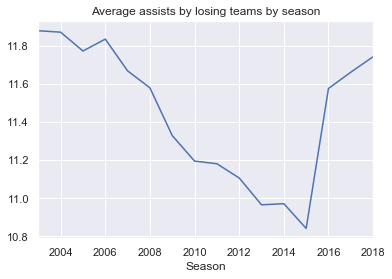

In [481]:
plt.title('Average assists by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LAst'].mean().plot();

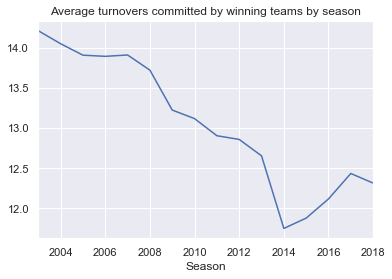

In [466]:
plt.title('Average turnovers committed by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WTO'].mean().plot();

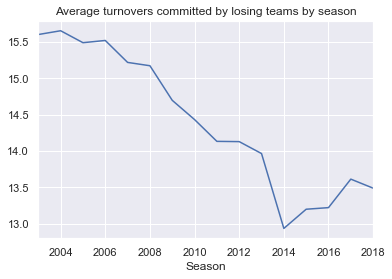

In [482]:
plt.title('Average turnovers committed by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LTO'].mean().plot();

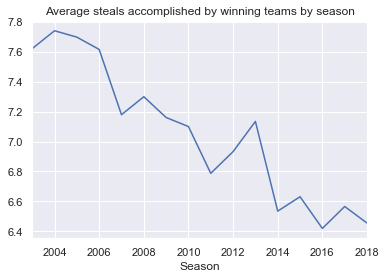

In [467]:
plt.title('Average steals accomplished by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WStl'].mean().plot();

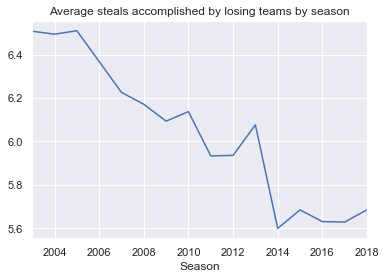

In [483]:
plt.title('Average steals accomplished by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LStl'].mean().plot();

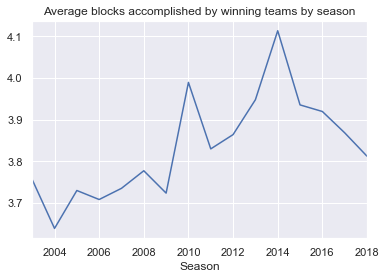

In [468]:
plt.title('Average blocks accomplished by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WBlk'].mean().plot();

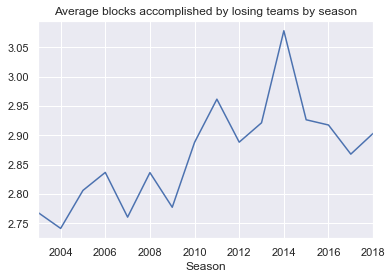

In [484]:
plt.title('Average blocks accomplished by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LBlk'].mean().plot();

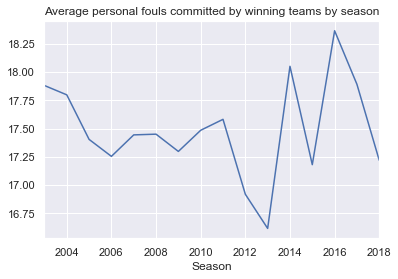

In [469]:
plt.title('Average personal fouls committed by winning teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['WPF'].mean().plot();

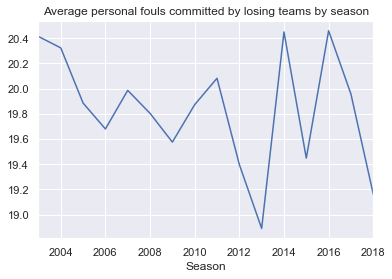

In [485]:
plt.title('Average personal fouls committed by losing teams by season');
data_dict['RegularSeasonDetailedResults'].groupby(['Season'])['LPF'].mean().plot();

# Massey Ordinals Data

In [490]:
massey_ordinals = pd.read_csv('resources/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv')

In [499]:
tourney_results = data_dict['NCAATourneyCompactResults']
tourney_results = tourney_results[tourney_results['Season'] > 2002]
tourney_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1136,2003,134,1421,92,1411,84,N,1
1137,2003,136,1112,80,1436,51,N,0
1138,2003,136,1113,84,1272,71,N,0
1139,2003,136,1141,79,1166,73,N,0
1140,2003,136,1143,76,1301,74,N,1
...,...,...,...,...,...,...,...,...
2179,2018,146,1242,85,1181,81,N,1
2180,2018,146,1437,71,1403,59,N,0
2181,2018,152,1276,69,1260,57,N,0
2182,2018,152,1437,95,1242,79,N,0


# Pomeroy Rankings (Since 2003)

In [492]:
pom_rankings = massey_ordinals[massey_ordinals['SystemName'] == 'POM']
pom_rankings.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
2968,2003,37,POM,1102,104
2969,2003,37,POM,1103,191
2970,2003,37,POM,1104,15
2971,2003,37,POM,1105,319
2972,2003,37,POM,1106,170


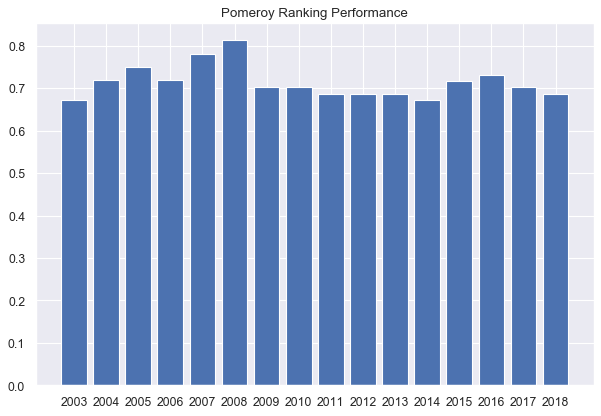

Pomeroy Average Performance:  71.41625 %


In [493]:
pom_results_yearly = {}

for match in tourney_results.values:
    pom_ranks = pom_rankings[(pom_rankings['Season'] == match[0]) & (pom_rankings['TeamID'] == match[2])]
    pom_ranks = pom_ranks[pom_ranks['RankingDayNum'] == pom_ranks['RankingDayNum'].max()]
    win_team_ranking = pom_ranks['OrdinalRank'].values[0]
    
    pom_ranks = pom_rankings[(pom_rankings['Season'] == match[0]) & (pom_rankings['TeamID'] == match[4])]
    pom_ranks = pom_ranks[pom_ranks['RankingDayNum'] == pom_ranks['RankingDayNum'].max()]
    lose_team_ranking = pom_ranks['OrdinalRank'].values[0]
    
    if match[0] in pom_results_yearly:
        rankings = pom_results_yearly[match[0]]
        rankings[1] = rankings[1] + 1
        if win_team_ranking < lose_team_ranking:
            rankings[0] = rankings[0] + 1
        pom_results_yearly[match[0]] = rankings
    else:
        if win_team_ranking < lose_team_ranking:
            pom_results_yearly[match[0]] = [1, 1]
        else:
            pom_results_yearly[match[0]] = [0, 1]
            
pom_results_yearly_rounded = {}

for year in pom_results_yearly:
    results = pom_results_yearly[year]
    pom_results_yearly_rounded[year] = round(results[0]/results[1],4)
    
figure(num=None, figsize=(9,6), dpi=80, facecolor='w', edgecolor='k')

plt.title(label='Pomeroy Ranking Performance')
 
plt.bar(range(len(pom_results_yearly_rounded)), list(pom_results_yearly_rounded.values()))

plt.xticks(range(len(pom_results_yearly_rounded)), list(pom_results_yearly_rounded.keys()))

plt.show()

print('Pomeroy Average Performance: ', statistics.mean(list(pom_results_yearly_rounded.values()))*100, '%')

# Sagarin Rankings (Since 2003)

In [497]:
sag_rankings = massey_ordinals[massey_ordinals['SystemName'] == 'SAG']
sag_rankings.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3622,2003,37,SAG,1102,114
3623,2003,37,SAG,1103,193
3624,2003,37,SAG,1104,11
3625,2003,37,SAG,1105,310
3626,2003,37,SAG,1106,257


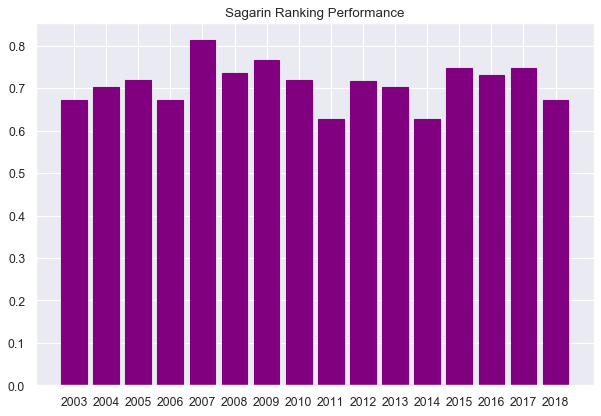

Sagarin Average Performance:  71.02625 %


In [495]:
sag_results_yearly = {}

for match in tourney_results.values:
    sag_ranks = sag_rankings[(sag_rankings['Season'] == match[0]) & (sag_rankings['TeamID'] == match[2])]
    sag_ranks = sag_ranks[sag_ranks['RankingDayNum'] == sag_ranks['RankingDayNum'].max()]
    win_team_ranking = sag_ranks['OrdinalRank'].values[0]
    
    sag_ranks = sag_rankings[(sag_rankings['Season'] == match[0]) & (sag_rankings['TeamID'] == match[4])]
    sag_ranks = sag_ranks[sag_ranks['RankingDayNum'] == sag_ranks['RankingDayNum'].max()]
    lose_team_ranking = sag_ranks['OrdinalRank'].values[0]
    
    if match[0] in sag_results_yearly:
        rankings = sag_results_yearly[match[0]]
        rankings[1] = rankings[1] + 1
        if win_team_ranking < lose_team_ranking:
            rankings[0] = rankings[0] + 1
        sag_results_yearly[match[0]] = rankings
    else:
        if win_team_ranking < lose_team_ranking:
            sag_results_yearly[match[0]] = [1, 1]
        else:
            sag_results_yearly[match[0]] = [0, 1]
            
sag_results_yearly_rounded = {}

for year in sag_results_yearly:
    results = sag_results_yearly[year]
    sag_results_yearly_rounded[year] = round(results[0]/results[1],4)
    
figure(num=None, figsize=(9,6), dpi=80, facecolor='w', edgecolor='k')

plt.title(label='Sagarin Ranking Performance')
 
barlist = plt.bar(range(len(sag_results_yearly_rounded)), list(sag_results_yearly_rounded.values()))

for bar in barlist:
    bar.set_color('purple')

plt.xticks(range(len(sag_results_yearly_rounded)), list(sag_results_yearly_rounded.keys()))

plt.show()

print('Sagarin Average Performance: ', statistics.mean(list(sag_results_yearly_rounded.values()))*100, '%')